In [1]:
!pip install torch torchvision torchaudio
!pip install rdkit-pypi
!pip install transformers
!pip install datasets
!pip install safe-mol
!pip install molfeat

  Using cached fsspec-2023.10.0-py3-none-any.whl.metadata (6.8 kB)
Using cached fsspec-2023.10.0-py3-none-any.whl (166 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.2.0
    Uninstalling fsspec-2024.2.0:
      Successfully uninstalled fsspec-2024.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
s3fs 2024.2.0 requires fsspec==2024.2.0, but you have fsspec 2023.10.0 which is incompatible.
gcsfs 2024.2.0 requires fsspec==2024.2.0, but you have fsspec 2023.10.0 which is incompatible.
  Using cached fsspec-2024.2.0-py3-none-any.whl.metadata (6.8 kB)
Using cached fsspec-2024.2.0-py3-none-any.whl (170 kB)
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.10.0
    Uninstalling fsspec-2023.10.0:
      Successfully uninstalled fsspec-2023.10.0
ERROR: pip's dependency resolver does not currently take into accou

In [2]:
import pandas as pd
import os

os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [3]:
zinc_data_path = './zinc250k.csv'
zinc_df = pd.read_csv(zinc_data_path)

zinc_df.head()

,smiles,qed,sa,parp1,fa7,5ht1b,braf,jak2
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,0.702012,0.879545,8.9,7.2,9.4,9.6,8.5
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,0.928975,0.729777,8.6,7.9,8.6,9.1,8.3
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,0.599682,0.836596,9.7,7.8,10.1,10.2,8.6
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,0.690944,0.797472,9.9,7.6,9.9,9.7,9.2
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,0.789027,0.662758,9.4,7.8,6.3,7.9,8.7


## Convert SMILES to SAFE

In [4]:
import safe as sf
import datamol as dm

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


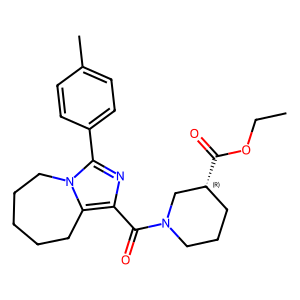

In [55]:
celecoxib = zinc_df['smiles'][3]
celecoxib_mol = dm.to_mol(celecoxib)

display(dm.to_image(celecoxib_mol))

In [56]:
safe_str = sf.encode(celecoxib, canonical=True, slicer='attach')

print(safe_str)
print(f"Representation using {len(safe_str.split('.'))} fragments")


c15nc%16n2c1C%17%30C%14%32C%44%22C%26%13C2%41%12.[C@]1%28%35C7%36N%19C%27%39C%42%33C1%43%31.c1%16c%23c6c9c%38c1%29.C48%18%24.C%40%10%18%20.C%379%11%25.C=%15%28%34.C5%19=%21.O%20%34.O=%15.O=%21.[H]4.[H]%24.[H]8.[H]%10.[H]%40.[H]%35.[H]%43.[H]%31.[H]%42.[H]%33.[H]%39.[H]%27.[H]%29.[H]%38.[H]%25.[H]%11.[H]%37.[H]6.[H]%23.[H]%30.[H]%17.[H]%32.[H]%14.[H]%22.[H]%44.[H]%13.[H]%26.[H]%12.[H]%41.[H]7.[H]%36
Representation using 42 fragments


In [7]:
# Add 'safe' column to dataframe and convert smiles to safe
# zinc_df['safe'] = zinc_df['smiles'].apply(lambda x: sf.encode(dm.to_mol(x), canonical=True, slicer='attach'))

In [57]:
# Use a smaller piece of the dataset for the sake of time
zinc_df_small = zinc_df.head(1000).copy()
zinc_df_small['safe'] = zinc_df_small['smiles'].apply(lambda x: sf.encode(x, canonical=True, slicer='attach'))
zinc_df_small.head()

,smiles,qed,sa,parp1,fa7,5ht1b,braf,jak2,safe
0,CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1,0.702012,0.879545,8.9,7.2,9.4,9.6,8.5,c1%20c%31c%17c2oc%14c%30c2c1%11.c1%27c%12c%18c...
1,C[C@@H]1CC(Nc2cncc(-c3nncn3C)c2)C[C@@H](C)C1,0.928975,0.729777,8.6,7.9,8.6,9.1,8.3,[C@@]14%13C5%12C%26%27C%11%22[C@@]%32%17C1%28%...
2,N#Cc1ccc(-c2ccc(O[C@@H](C(=O)N3CCCC3)c3ccccc3)...,0.599682,0.836596,9.7,7.8,10.1,10.2,8.6,N1%12C%14%22C%13%25C%34%17C16%27.c1%26c8c%18c%...
3,CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c...,0.690944,0.797472,9.9,7.6,9.9,9.7,9.2,c15nc%16n2c1C%17%30C%14%32C%44%22C%26%13C2%41%...
4,N#CC1=C(SCC(=O)Nc2cccc(Cl)c2)N=C([O-])[C@H](C#...,0.789027,0.662758,9.4,7.8,6.3,7.9,8.7,C1%25=C%27N=C9[C@@]%294C12C%288C%31%20C%30%21C...


## Baseline: SAFE-gpt based on gpt2

In [58]:
designer = sf.SAFEDesign.load_default(verbose=True)

designer.model

SAFEDoubleHeadsModel(
  (transformer): GPT2Model(
    (wte): Embedding(1880, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=1880, bias=False)
  (multiple_choice_head): PropertyHead(
    (summary): Linear(in_features=768, out_features=64, bias=True)
    

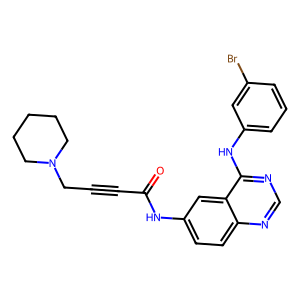

In [59]:
# Take an example molecule from the dataset
# candidate_mol = dm.to_mol(zinc_df_small['smiles'][3])

candidate_smiles = "O=C(C#CCN1CCCCC1)Nc1ccc2ncnc(Nc3cccc(Br)c3)c2c1"
candidate_mol = dm.to_mol(candidate_smiles)

dm.to_image(candidate_mol)

## De novo generation - without constraints

In [81]:
generated_smiles = designer.de_novo_generation(sanitize=True, n_samples_per_trial=400)

generated_smiles[:5]

  0%|          | 0/1 [00:00<?, ?it/s]

Failed to find the pandas get_adjustment() function to patch
Failed to find the pandas get_adjustment() function to patch
Failed to find the pandas get_adjustment() function to patch
Failed to find the pandas get_adjustment() function to patch
Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality
Failed to patch pandas - PandasTools will have limited functionality
Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality
Failed to patch pandas - PandasTools will have limited functionality
Failed to patch pandas - PandasTools will have limited functionality
Failed to patch pandas - PandasTools will have limited functionality
Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality
Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - Pand

['CC(C)(C)NS(=O)(=O)c1ccc(Cl)c(C(=O)OCC(=O)N2CCCC2)c1',
 'Cc1cc(C#N)nc(NC[C@H]2CCN(C(=O)[C@H]3COC(=O)N3)C2)n1',
 'C[C@H]1CCCN(c2cc(-c3nc(CC(=O)NCc4ccccc4)no3)ccn2)C1',
 'C[C@H](C[C@@H]1CCCO1)NC(=O)N[C@@H](C)c1cnn(Cc2ccccc2)c1',
 'CC(C)OCCCC(=O)O[C@H](C(=O)NCc1ccccc1)c1ccccc1']

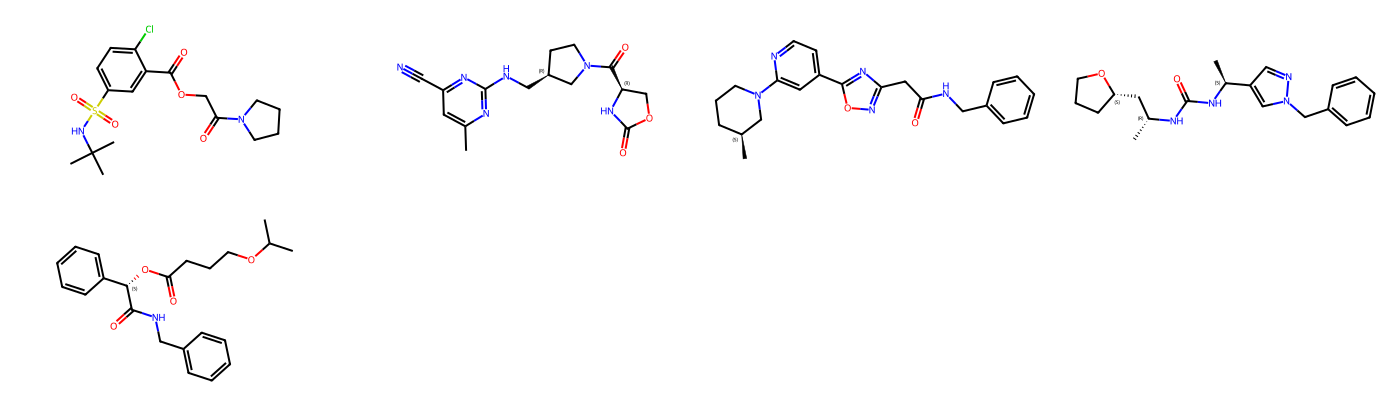

In [82]:
dm.to_image(generated_smiles[:5], mol_size=(350, 200))

In [83]:
from rdkit import Chem
from rdkit.Chem import QED

In [84]:
# Evaluate the quality of the generated molecules
def qed_score(smiles):
    # convert smiles to safe
    safe_str = sf.encode(smiles, canonical=True, slicer='attach')
    # convert safe to mol
    # mol = dm.to_mol(safe_str)
    mol = dm.to_mol(smiles)

    # Calculate the QED score
    qed_score = QED.qed(mol)
    return qed_score

# Calculate the QED score for each molecule
qed_scores = [qed_score(s) for s in generated_smiles]
qed_scores

[0.7618747534959256,
 0.7984483343359663,
 0.6945084461891056,
 0.8001033831445551,
 0.5111066615718552,
 0.8665622544755486,
 0.8183779979980021,
 0.5697639742621186,
 0.4642548785646865,
 0.7586015980414229,
 0.8576407348785365,
 0.5960015390813952,
 0.7544894305139711,
 0.8746492476244244,
 0.8029401224796653,
 0.7894740167607327,
 0.5190985000928279,
 0.8037360513080806,
 0.5182920982088669,
 0.7544704549063259,
 0.6966826942201975,
 0.6284037568347376,
 0.8419176207690475,
 0.901361078932647,
 0.7638024100658,
 0.5839558394369692,
 0.7662343869102487,
 0.5850815865365647,
 0.7316192153405345,
 0.47117145733013316,
 0.8474221683879875,
 0.721607463287779,
 0.6658181206840961,
 0.4315902163979298,
 0.8127468858923248,
 0.6362324021426381,
 0.4173567044995699,
 0.7605782186002271,
 0.8482651648133192,
 0.6488052333124995,
 0.7638625598475334,
 0.8536480691296412,
 0.24383337516131973,
 0.8489623708130274,
 0.5575830766993353,
 0.7103591202963516,
 0.598611125598184,
 0.92385331959841

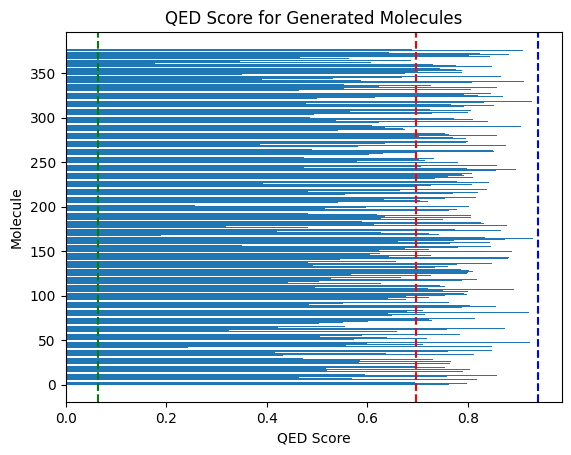

In [85]:
# plot the molecule alongside its QED score
import matplotlib.pyplot as plt
import numpy as np

# Plot the average qed with a red dotted line
avg_qed = np.mean(qed_scores)
fig, ax = plt.subplots()
ax.barh(np.arange(len(generated_smiles)), qed_scores)
ax.axvline(avg_qed, color='r', linestyle='--')

# plot line for minimum
ax.axvline(min(qed_scores), color='g', linestyle='--')

# plot line for maximum
ax.axvline(max(qed_scores), color='b', linestyle='--')

ax.set_xlabel('QED Score')
ax.set_ylabel('Molecule')
ax.set_title('QED Score for Generated Molecules')
plt.show()

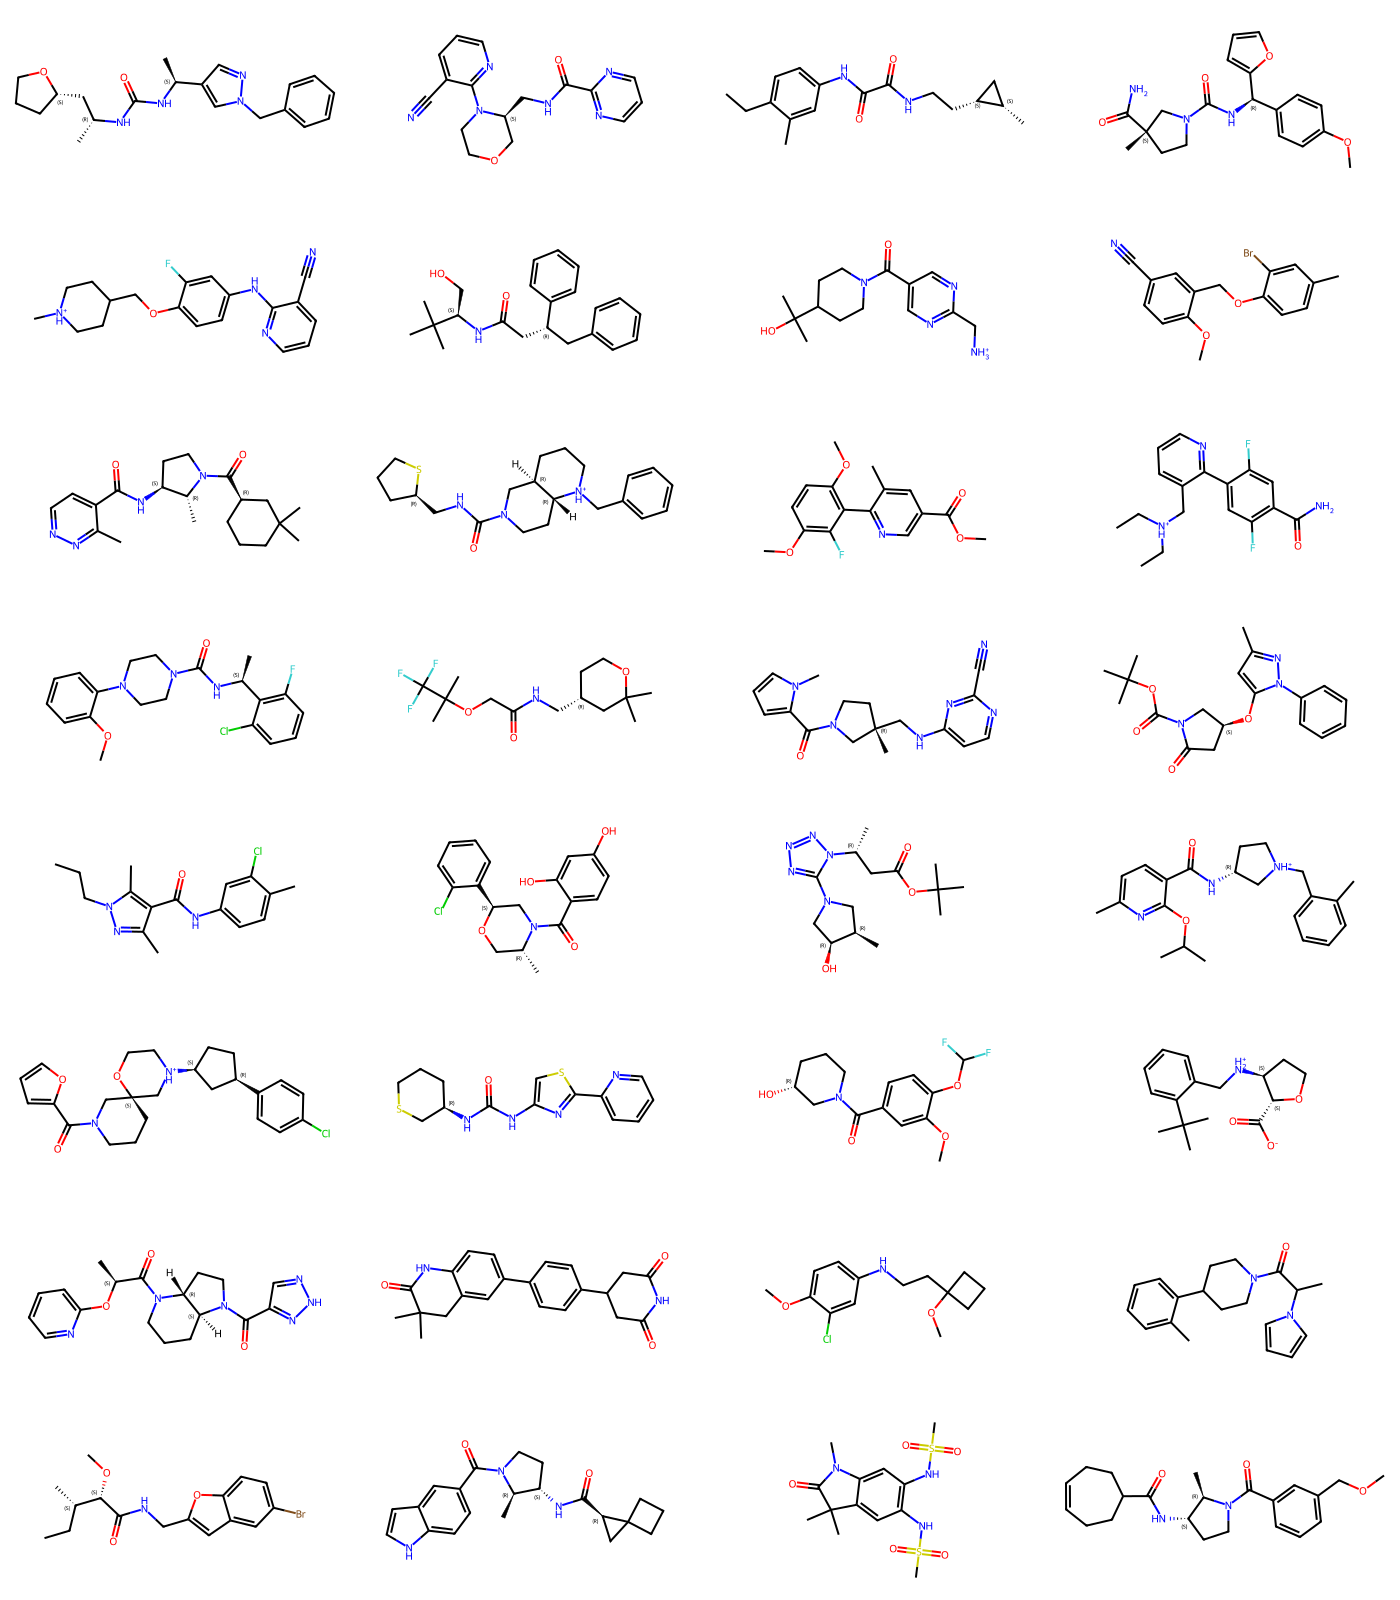

In [89]:
# Isolate the molecules with the top QED scores
top_molecules = [s for s, q in zip(generated_smiles, qed_scores) if q > 0.8]

# Display the top molecules
dm.to_image(top_molecules, mol_size=(350, 200))

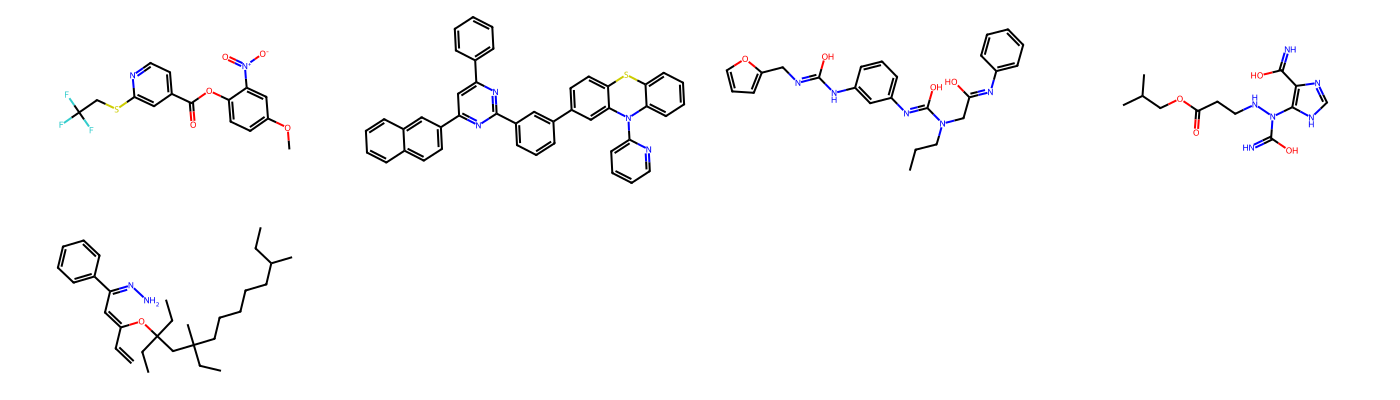

In [92]:
# Isolate the molecules with the lowest QED scores
low_molecules = [s for s, q in zip(generated_smiles, qed_scores) if q < 0.3]

# Display the low molecules
dm.to_image(low_molecules, mol_size=(350, 200))

## Scaffold Decoration - constraint of particular scaffold

In [34]:
# Example smile and safe strings from dataset
smile = zinc_df_small['smiles'][3]
safe = zinc_df_small['safe'][3]
smile, safe

('CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c2CCCCC3)C1',
 'c15nc%16n2c1C%17%30C%14%32C%44%22C%26%13C2%41%12.[C@]1%28%35C7%36N%19C%27%39C%42%33C1%43%31.c1%16c%23c6c9c%38c1%29.C48%18%24.C%40%10%18%20.C%379%11%25.C=%15%28%34.C5%19=%21.O%20%34.O=%15.O=%21.[H]4.[H]%24.[H]8.[H]%10.[H]%40.[H]%35.[H]%43.[H]%31.[H]%42.[H]%33.[H]%39.[H]%27.[H]%29.[H]%38.[H]%25.[H]%11.[H]%37.[H]6.[H]%23.[H]%30.[H]%17.[H]%32.[H]%14.[H]%22.[H]%44.[H]%13.[H]%26.[H]%12.[H]%41.[H]7.[H]%36')

In [37]:
safe = sf.encode(smile)
safe

'c17nc9n2c1CCCCC2.[C@@H]18CCCN5C1.c19ccc(C)cc1.C48=O.C57=O.CC6.O46'

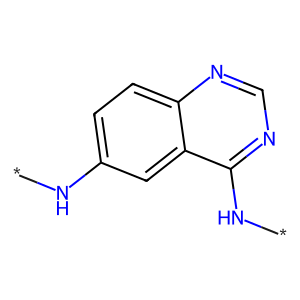

In [38]:
scaffold = "[*]N-c1ccc2ncnc(-N[*])c2c1"

dm.to_image(scaffold)


In [39]:
generated_smiles = designer.scaffold_decoration(
    scaffold=scaffold,
    n_samples_per_trial=12,
    n_trials=2,
    sanitize=True,
    do_not_fragment_further=True,
)

generated_mols = [dm.to_mol(x) for x in generated_smiles]

  0%|          | 0/2 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/generation/configuration_utils.py:433: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
2024-02-28 13:56:59.364 | INFO     | safe.sample:scaffold_decoration:538 - After sanitization, 22 / 24 (91.67 %)  generated molecules are valid !


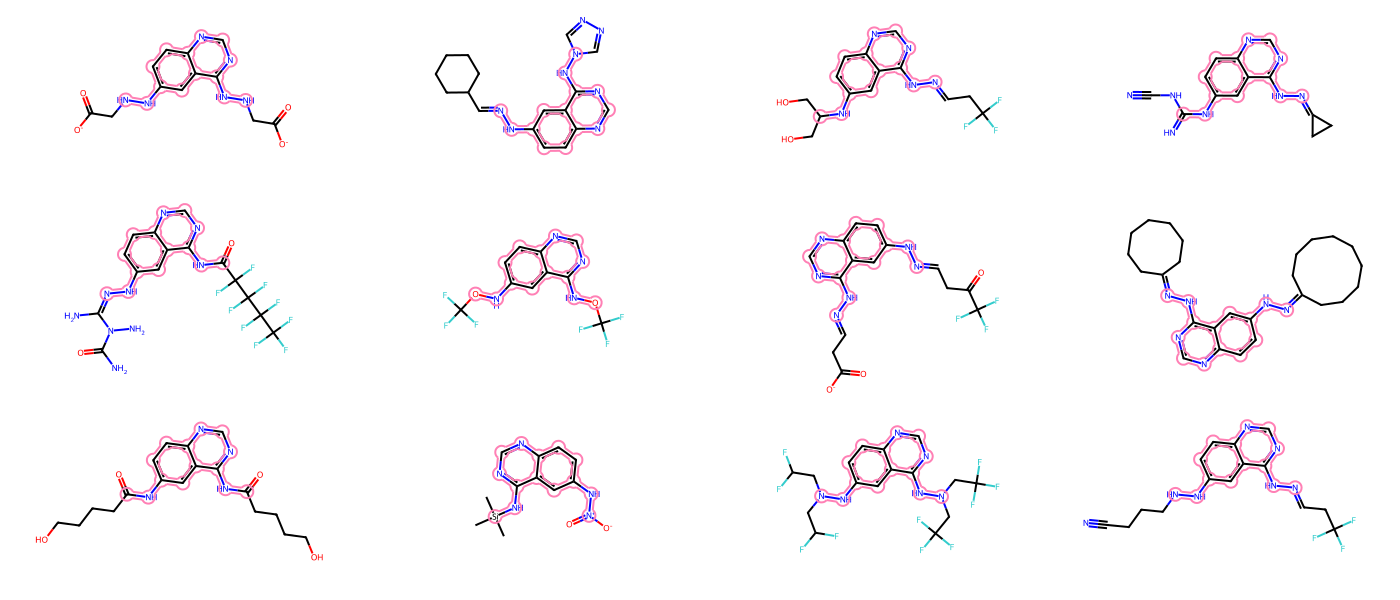

In [40]:
dm.viz.lasso_highlight_image(generated_mols[:12], dm.from_smarts(scaffold), mol_size=(350, 200), color_list=["#ff80b5"], scale_padding=0.1)

## Super structure generation - constraint of particular super structure

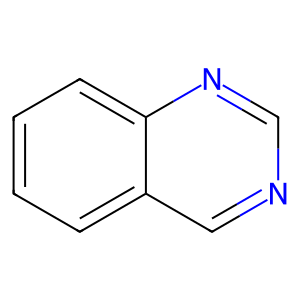

In [41]:
superstructure = "c1ccc2ncncc2c1"

dm.to_image(superstructure)

In [42]:
generated_smiles = designer.super_structure(
    core=superstructure,
    n_samples_per_trial=12,
    n_trials=1,
    sanitize=True,
    do_not_fragment_further=False,
    attachment_point_depth=3,
)

generated_smiles

  0%|          | 0/1 [00:00<?, ?it/s]

2024-02-28 13:57:00.757 | INFO     | safe.sample:super_structure:492 - After sanitization, 12 / 12 (100.00 %)  generated molecules are valid !


['O=C([O-])c1ncc2ccccc2n1',
 'O=C([O-])C(=O)CCCSc1ncc2ccccc2n1',
 'O=C([O-])C[C@H](NC(=O)c1ncc2ccccc2n1)C(=O)[O-]',
 'N[C@H](C(=O)Nc1ncc2ccccc2n1)C(F)(F)F',
 'N#CCCCC(=O)Nc1ncc2ccccc2n1',
 'FC(F)(F)Oc1ncc2ccccc2n1',
 'N#Cc1ccncc1-c1ncc2ccccc2n1',
 'OC[C@@H](CC(F)(F)F)Nc1ncc2ccccc2n1',
 'O=C(NCCCS)Nc1ncc2ccccc2n1',
 'OCc1ncc2ccccc2n1',
 'O=C(CC=Nc1ncc2ccccc2n1)C(F)(F)F',
 'O[C@H](CNc1ncc2ccccc2n1)CC(F)(F)F']

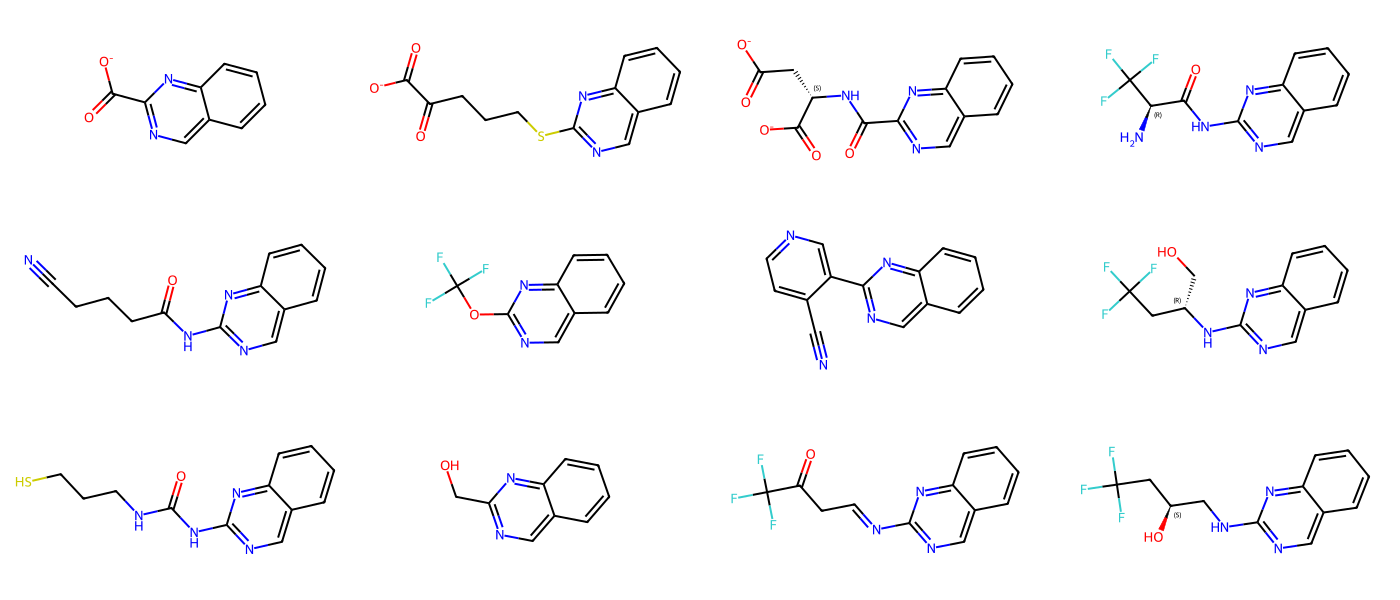

In [43]:
dm.to_image(generated_smiles[:12], mol_size=(350, 200))

## Motif Extension - constraint of particular motif

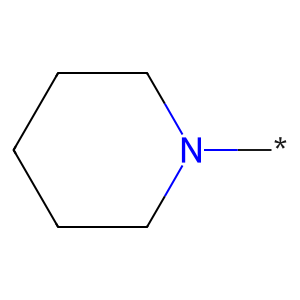

In [44]:
motif = "[*]-N1CCCCC1"

dm.to_image(motif)

In [45]:
# let's make some long sequence
generated_smiles = designer.motif_extension(
    motif=motif,
    n_samples_per_trial=12,
    n_trials=1,
    sanitize=True,
    do_not_fragment_further=False,
    min_length=25,
    max_length=80,
)

generated_smiles

  0%|          | 0/1 [00:00<?, ?it/s]

2024-02-28 13:57:04.551 | INFO     | safe.sample:scaffold_decoration:538 - After sanitization, 12 / 12 (100.00 %)  generated molecules are valid !


['N#CCCCCS(=O)(=O)NCCC(=O)N1CCCCC1',
 'O=C([O-])CSCC(=O)NCCC(=O)N1CCCCC1',
 'O=C([O-])CSCC(=O)OCC(=O)N1CCCCC1',
 'O=C(CCC(=O)N1CCCCC1)NC[C@H](O)C(F)F',
 'O=C(NCC(=O)N1CCCCC1)NC[C@@H](O)C(F)F',
 'NC(=O)CCCCCC(=O)N1CCCCC1',
 'O=C(N1CCCCC1)C(F)(F)C(F)(F)C(F)(F)C(F)(F)C(F)(F)F',
 'CCCC.FC(F)=CCN1CCCCC1',
 'O=C([O-])CC[NH+](CC(=O)[O-])CC(=O)N1CCCCC1',
 'BrCCCCCCCCCOCCCCCCCCCN1CCCCC1',
 'O=C(CS(=O)(=O)CCC(F)(F)C(F)(F)F)N1CCCCC1',
 'O=C(NCCOCCF)NCC(=O)N1CCCCC1']

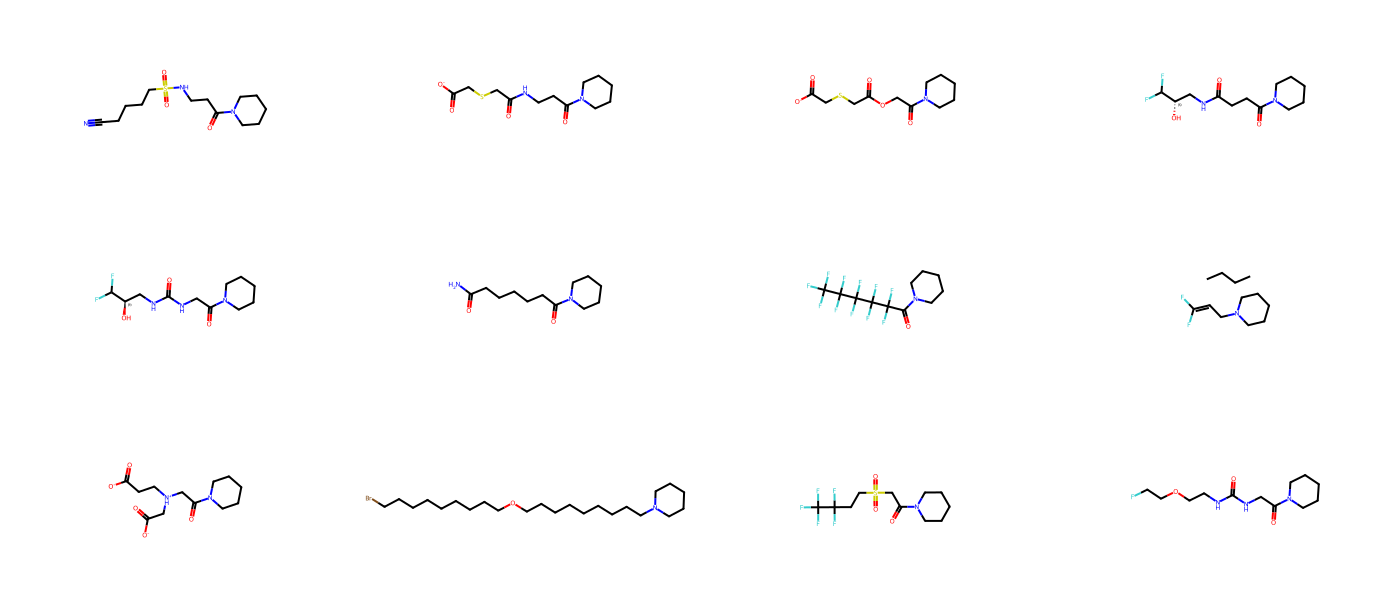

In [46]:
dm.to_image(generated_smiles[:12], mol_size=(350, 200))

## Scaffold Hopping - constraint of particular scaffold

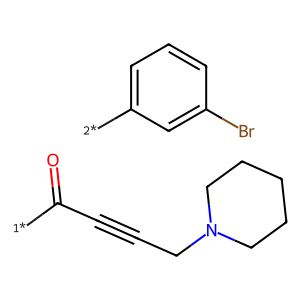

In [47]:
side_chains = "[1*]C(=O)C#CCN1CCCCC1.[2*]c1cccc(Br)c1"

dm.to_image(side_chains)

  0%|          | 0/1 [00:00<?, ?it/s]

2024-02-28 13:57:16.820 | INFO     | safe.sample:_fragment_linking:393 - After sanitization, 12 / 12 (100.00 %)  generated molecules are valid !


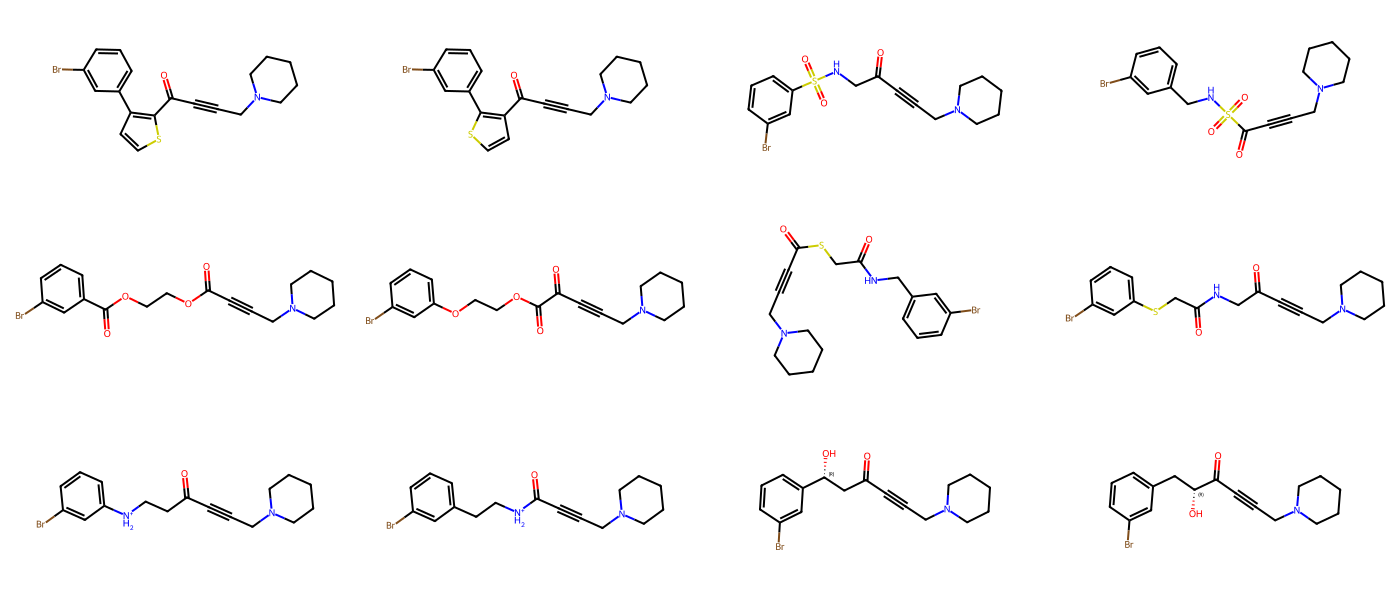

In [48]:
generated_smiles = designer.scaffold_morphing(
    side_chains=side_chains,
    n_samples_per_trial=12,
    n_trials=1,
    sanitize=True,
    do_not_fragment_further=False,
    random_seed=100,
)

dm.to_image(generated_smiles[:12], mol_size=(350, 200))

## Linker generation - constraint of particular linker

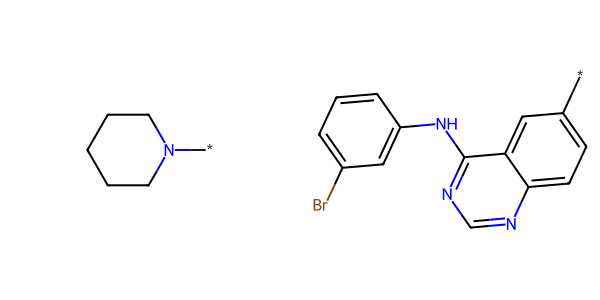

In [49]:
linker_generation = ["[*]-N1CCCCC1", "Brc1cccc(Nc2ncnc3ccc(-[*])cc23)c1"]

dm.to_image(linker_generation)

In [50]:
generated_smiles = designer.linker_generation(
    *linker_generation,
    n_samples_per_trial=12,
    n_trials=1,
    sanitize=True,
    do_not_fragment_further=False,
    random_seed=100,
)

generated_smiles


  0%|          | 0/1 [00:00<?, ?it/s]

2024-02-28 13:57:20.030 | INFO     | safe.sample:_fragment_linking:393 - After sanitization, 12 / 12 (100.00 %)  generated molecules are valid !


['Brc1cccc(Nc2ncnc3ccc(-c4nc5c(N6CCCCC6)ccnc5[nH]4)cc23)c1',
 'Brc1cccc(Nc2ncnc3ccc(-c4ccnc5[nH]c(N6CCCCC6)nc45)cc23)c1',
 'Brc1cccc(Nc2ncnc3ccc(-c4nc(N5CCCCC5)c5ccsc5n4)cc23)c1',
 'Brc1cccc(Nc2ncnc3ccc(-c4nc(N5CCCCC5)nc5sccc45)cc23)c1',
 'Brc1cccc(Nc2ncnc3ccc(N=C4S[C@@H]5CNC[C@H]5N4N=CN4CCCCC4)cc23)c1',
 'Brc1cccc(Nc2ncnc3ccc(C=NN4C(=NN5CCCCC5)S[C@@H]5CNC[C@H]54)cc23)c1',
 'O=c1c2cc3ccccc3cc2c(N2CCCCC2)nn1-c1ccc2ncnc(Nc3cccc(Br)c3)c2c1',
 'O=c1c2cc3ccccc3cc2c(-c2ccc3ncnc(Nc4cccc(Br)c4)c3c2)nn1N1CCCCC1',
 'O=S1(=O)C2(N3CCCCC3)SCCCN2C1(c1ccc2ncnc(Nc3cccc(Br)c3)c2c1)N1CCOCC1',
 'O=S1(=O)C2(c3ccc4ncnc(Nc5cccc(Br)c5)c4c3)SCCCN2C1(N1CCCCC1)N1CCOCC1',
 'Brc1cccc(Nc2ncnc3ccc(C=CN4CCCCC4)cc23)c1',
 'Brc1cccc(Nc2ncnc3ccc(C=CN4CCCCC4)cc23)c1']

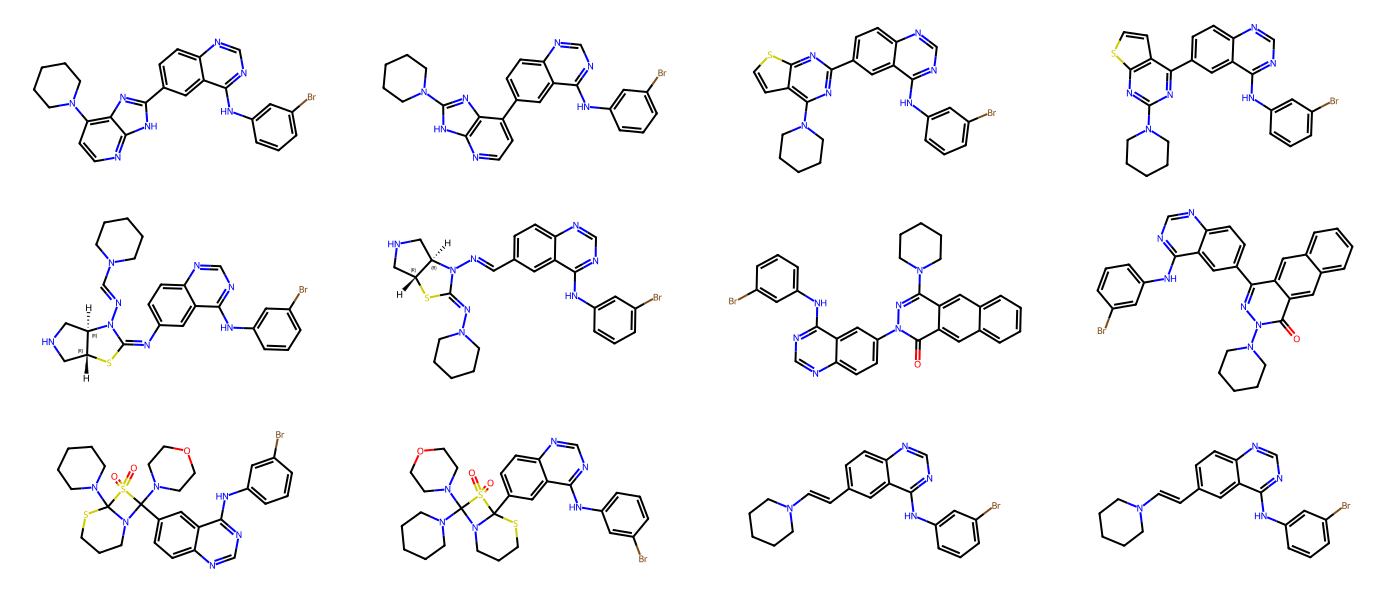

In [51]:
dm.to_image(generated_smiles[:12], mol_size=(350, 200))